Text(0.5, 1.0, 'histogram of gray values')

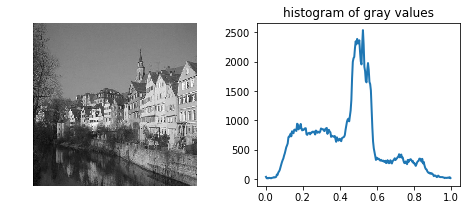

In [112]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram
from commonfunctions import *

coins = rgb2gray(io.imread('images/house 2-small.jpg'))

hist, hist_centers = histogram(coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

In [94]:
# coins  = data.coins()
print(coins)


[[0.65930157 0.22182    0.32582039 ... 0.41592039 0.42376353 0.42376353]
 [0.66797804 0.23750627 0.33169137 ... 0.41984196 0.41984196 0.41984196]
 [0.66377373 0.21424471 0.38267176 ... 0.42404627 0.41620314 0.41620314]
 ...
 [0.58572039 0.00280549 0.07313373 ... 0.52193961 0.45919451 0.4984102 ]
 [0.58964196 0.00280549 0.08097686 ... 0.51801804 0.52978275 0.52586118]
 [0.58179882 0.00561098 0.08489843 ... 0.41213569 0.51801804 0.49448863]]


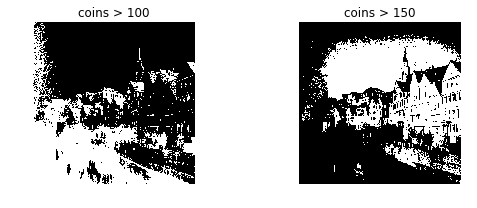

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(coins < 0.35, cmap=plt.cm.gray, interpolation='nearest')
axes[0].set_title('coins > 100')

axes[1].imshow(coins > 0.50, cmap=plt.cm.gray, interpolation='nearest')
axes[1].set_title('coins > 150')

for a in axes:
    a.axis('off')

plt.tight_layout()


(-0.5, 399.5, 399.5, -0.5)

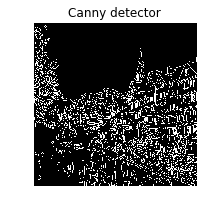

In [122]:
from skimage.feature import canny
from scipy import ndimage
edges = canny(coins)
# edges = ndimage.gaussian_laplace(coins, sigma=0.5) 
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')

(-0.5, 399.5, 399.5, -0.5)

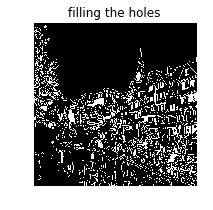

In [123]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('filling the holes')
ax.axis('off')

(-0.5, 399.5, 399.5, -0.5)

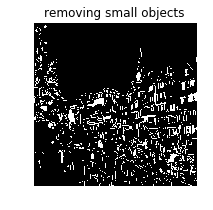

In [126]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 10)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('removing small objects')
ax.axis('off')

(-0.5, 399.5, 399.5, -0.5)

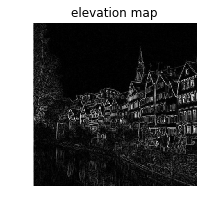

In [119]:
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')

(-0.5, 399.5, 399.5, -0.5)

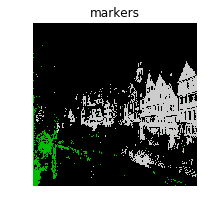

In [80]:
markers = np.zeros_like(coins)
markers[coins < 30/255] = 1
markers[coins > 150/255] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')


/opt/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


(-0.5, 399.5, 399.5, -0.5)

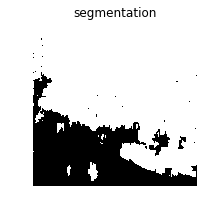

In [120]:
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmentation')
ax.axis('off')


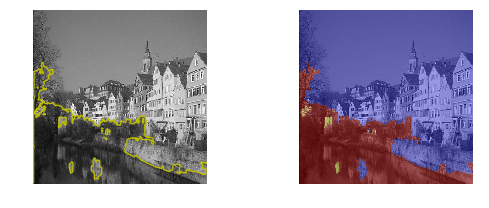

In [121]:
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()
